In [11]:
%run ../src/python/helpers.py

%matplotlib inline
from numpy import nan
from pandas import read_feather

data = read_feather("../data/aeolus_top5drugs.feather")

plot_settings()

## How many reports for each drug class?

In [3]:
cl = ['atc_1st','atc_2nd','atc_3rd','atc_4th','drug_concept_name']

d = dropdown(cl)
d

Dropdown(layout=Layout(display='flex', width='30%'), options=('atc_1st', 'atc_2nd', 'atc_3rd', 'atc_4th', 'dru…

In [205]:
series = freqXbyY(data,d.label,d.label)

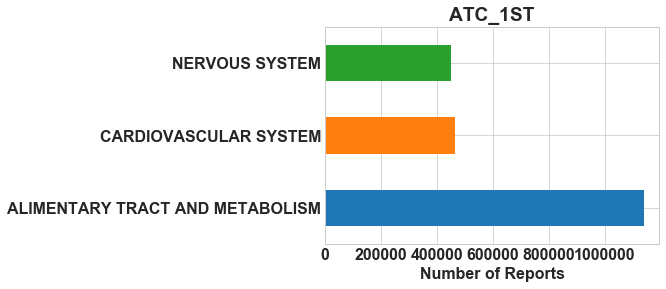

In [206]:
p = plot(series,kind='barh')
q = p.set_title(p.get_ylabel().upper(),rotation=0,weight='bold')
q = p.set_ylabel("")
q = p.set_xlabel("Number of Reports",weight="bold")

## How many are reported across the years?

In [207]:
series2 = freqXbyY(data,'report_year',d.label)

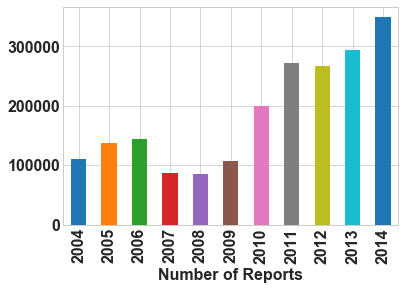

In [208]:
p = plot(series2,kind='bar')
q = p.set_title(p.get_ylabel().upper(),rotation=0,weight='bold')
q = p.set_ylabel(p.get_ylabel(),rotation=0)
q = p.set_xlabel("Number of Reports",weight="bold")

## How many are reported within this class across the sexes?

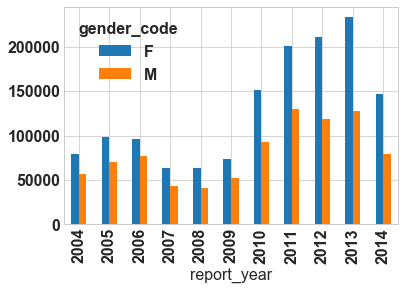

In [209]:
#plot variables for filtering/wrangling
bars = 'gender_code'
x = 'report_year'
count = 'id'
ry = None

#want to filter dataset for M/F gender and if report year was clicked or selected
if ry is None:
    dat = clean_gender(data)
else:
    dat = clean_gender(data).query('report_year==@ry')

#main
sub = dat[[bars,x,count]]
plot_sub = sub.groupby([bars,x]).count().reset_index(level=bars).pivot(columns=bars)
plot_sub.columns = plot_sub.columns.droplevel(level=0)
plot_sub.plot.bar()

## How many are reported within this class across ages?

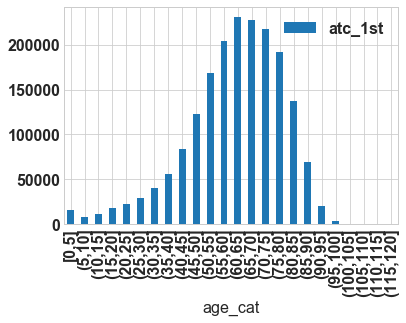

In [210]:
#plot variables for filtering/wrangling
grp = 'age_cat'

#main
dat[[d.label,grp]].groupby([grp]).count().plot.bar()

## How many are reported within this class across ages for each sex?

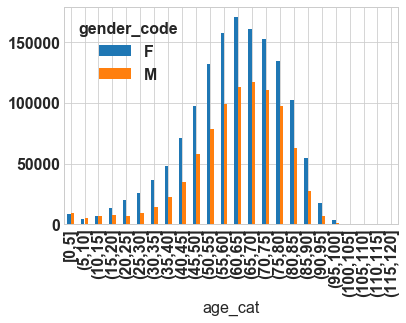

In [211]:
#plot variables for filtering/wrangling
bars = 'gender_code'
x = 'age_cat'
count = 'id'

#want to filter dataset for M/F gender and if report year was clicked or selected
sub = clean_gender(data)[[bars,x,count]]

#main
plot_sub = sub.groupby([bars,x]).count().reset_index(level=bars).pivot(columns=bars)
plot_sub.columns = plot_sub.columns.droplevel(level=0)
plot_sub.plot.bar()